In [2]:
#Secant Method

In [3]:
#Libarires imported
import math as m
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# function f defined
def f( x: float) -> float : 
    return m.pow(x,3)*m.cos(x)*m.sin(x)+3*m.pow(x,2)*m.sin(x)-3*x

In [5]:
# first derivative of function f defined

def df(x) :
    return m.sin(x)*(6*x+3*m.pow(x,2)*m.cos(x)-pow(x,3)*m.sin(x))+\
           m.cos(x)*(m.pow(x,3)*m.cos(x)+3*m.pow(x,2))-3

In [6]:
# g_ratio calculation

def g_ratio(x0,x1,x2):
    return abs(x2-x1)*1.0/abs(x1-x0)**1.618

In [29]:
def secant_method(f,df,x0,x1,eps=1e-12,max_it=int(1e12)): # 3 inputs needed x0, x1 and df to calculate x* 
    i=0 # stores # of iterations
    
    its=[] # These lists are constructed for holding information of each iteration
    x_=[]
    f_=[]
    df_=[]
    diff=[]
    
    for i in range(max_it):
        
        x2=x1-df(x1)*(x1-x0)/(df(x1)-df(x0)) # main calculation of secant method, candidate x-value calculated
        
        its.append(i) # iterations stored there
        x_.append(x1)
        f_.append(f(x1))
        df_.append(df(x1))
        diff.append(g_ratio(x0,x1,x2))
        
        x0,x1=x1,x2 #moving to new x0,x1 values
        i=i+1 # moving to next iteration
        
        if(abs(df(x1))<eps): # if condition is provided,than loop will end. That means optimal x value found
            its.append(i)
            x_.append(x1)
            f_.append(f(x1))
            df_.append(df(x1))
            diff.append(g_ratio(x0,x1,x2))
            break
            
            
    df=pd.DataFrame({'Iterations':its,'X_Values':x_,'F_Values':f_,'DF_Values':df_,
                    '|x_(k+1) -x_k|/|x_k-x_(k-1)|**(1.618)':diff})
    
    print(df)
    print("Optimal x value: %f \nOptimal output: %f" %(x1,f(x1)))
    return(x1)

In [30]:
output=secant_method(f,df,-10,10)

   Iterations   X_Values    F_Values     DF_Values  \
0           0  10.000000  263.266292  2.576611e+02   
1           1   5.272480 -152.441675 -8.686562e+01   
2           2   6.464431   51.101253  4.021188e+02   
3           3   5.484224 -163.557853 -1.322226e+01   
4           4   5.515428 -163.765684 -7.846977e-03   
5           5   5.515447 -163.765684  1.596061e-04   
6           6   5.515447 -163.765684 -1.811998e-09   
7           7   5.515447 -163.765684 -2.273737e-13   

   |x_(k+1) -x_k|/|x_k-x_(k-1)|**(1.618)  
0                               0.037116  
1                               0.096539  
2                               0.737788  
3                               0.032230  
4                               0.005061  
5                              16.751619  
6                               0.107241  
7                               0.000000  
Optimal x value: 5.515447 
Optimal output: -163.765684


In [18]:
a=-10
b=10
root=output
num_pts = int(1e4)
x = [a+(b-a)*i/num_pts for i in range(num_pts)]
y_f = [f(xn) for xn in x] 
y_df = [df(xn) for xn in x] 

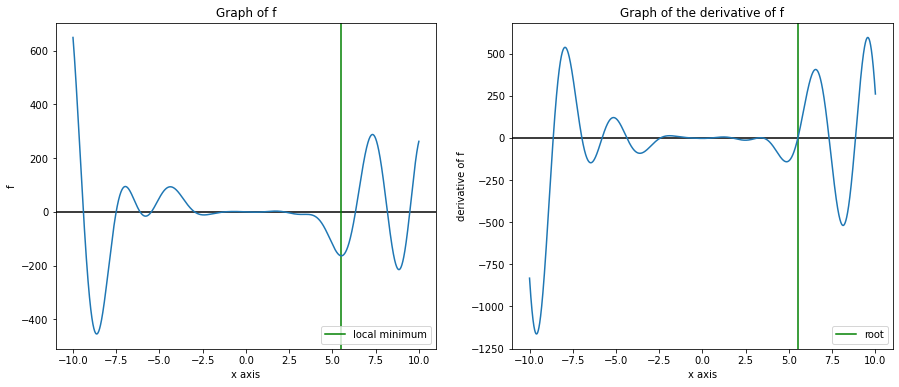

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].axhline(0, color='black')
axes[0].axvline(root, color='g', label='local minimum')
axes[0].plot(x,y_f)
axes[0].set_title('Graph of f')
axes[0].set_xlabel('x axis')
axes[0].set_ylabel('f')
axes[0].legend(loc='lower right')

axes[1].axhline(0, color='black')
axes[1].axvline(root, color='g', label='root')
axes[1].plot(x,y_df)
axes[1].set_title('Graph of the derivative of f')
axes[1].set_xlabel('x axis')
axes[1].set_ylabel('derivative of f')
axes[1].legend(loc='lower right')

plt.show()